<h3>Feature Selection With Scikit Learn</h3>

<h5>Feature Selection Based on Variance</h5>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style('darkgrid')

In [2]:
wine_data = pd.read_csv('./datasets/winequality-red.csv')
wine_data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Dividing data into features and labels
features = wine_data.drop(['quality'], axis=1)
labels = wine_data.filter(['quality'], axis=1)

In [4]:
features.var()

fixed acidity              3.000527
volatile acidity           0.032104
citric acid                0.037595
residual sugar             1.975473
chlorides                  0.002048
free sulfur dioxide      109.423196
total sulfur dioxide    1078.409000
density                    0.000004
pH                         0.023515
sulphates                  0.026588
alcohol                    1.124386
dtype: float64

In [5]:
# Filtering features based on threshold
from sklearn.feature_selection import VarianceThreshold

val_sel = VarianceThreshold(threshold=0.1)
# val_set.fit(features)

In [6]:
val_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [7]:
attributes_to_retain = features.columns[val_sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [8]:
attributes_to_filter = [attr for attr in features.columns if attr not in features.columns[var_sel.get_support()]]

NameError: name 'var_sel' is not defined

<h5>Feature Selection Based on Correlation</h5>

In [9]:
# Printing Correlation
correlation_matrix = features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.255155,0.673008,0.106105,0.093876,-0.157011,-0.116725,0.670895,-0.685062,0.185061,-0.073644
volatile acidity,-0.255155,1.000000,-0.554503,0.003957,0.064332,-0.010077,0.077515,0.022390,0.235119,-0.269707,-0.201160
citric acid,0.673008,-0.554503,1.000000,0.139208,0.185893,-0.065745,0.033206,0.363162,-0.537645,0.306241,0.108285
residual sugar,0.106105,0.003957,0.139208,1.000000,0.053401,0.186203,0.203252,0.355503,-0.081154,0.002378,0.033380
chlorides,0.093876,0.064332,0.185893,0.053401,1.000000,-0.005569,0.043551,0.197957,-0.250010,0.339910,-0.224965
free sulfur dioxide,-0.157011,-0.010077,-0.065745,0.186203,-0.005569,1.000000,0.668426,-0.023672,0.076000,0.043461,-0.070382
total sulfur dioxide,-0.116725,0.077515,0.033206,0.203252,0.043551,0.668426,1.000000,0.070240,-0.060311,0.027173,-0.208148
density,0.670895,0.022390,0.363162,0.355503,0.197957,-0.023672,0.070240,1.000000,-0.340093,0.145326,-0.499736
pH,-0.685062,0.235119,-0.537645,-0.081154,-0.250010,0.076000,-0.060311,-0.340093,1.000000,-0.173073,0.211157
sulphates,0.185061,-0.269707,0.306241,0.002378,0.339910,0.043461,0.027173,0.145326,-0.173073,1.000000,0.102423


<Axes: >

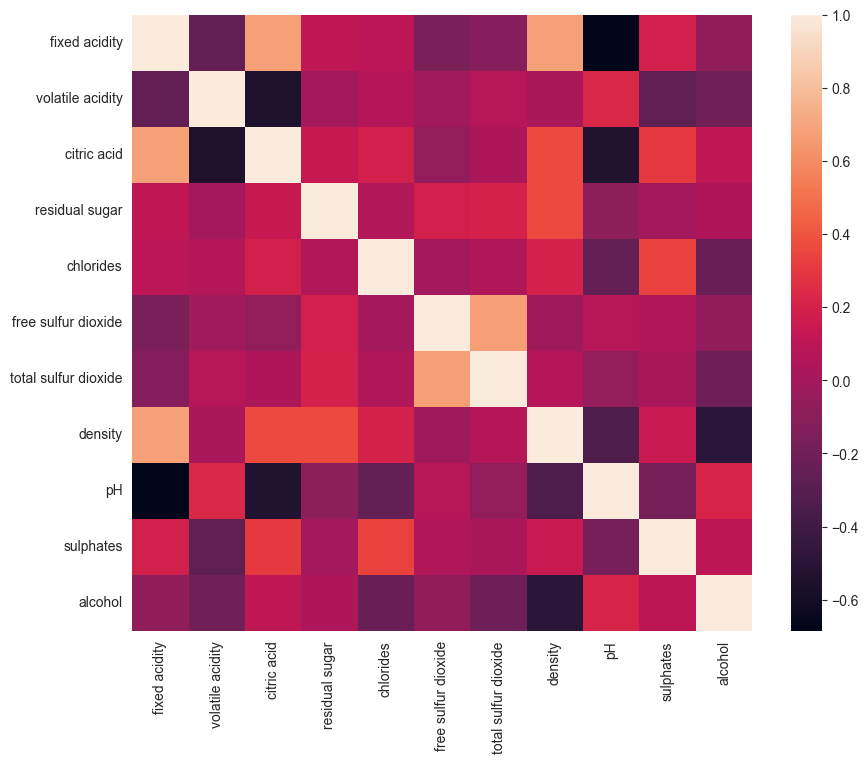

In [10]:
sns.heatmap(correlation_matrix)

In [14]:
# Creating a correlation matrix for features

correlated_features_matrix = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            corr_col = correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

In [15]:
len(correlated_features_matrix)

4

In [16]:
correlated_features_matrix

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [17]:
filtered_dataset = features.drop(correlated_features_matrix, axis = 1)
filtered_dataset.head(30)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8
4,7.4,0.700,1.9,0.076,11.0,0.56,9.4
5,7.4,0.660,1.8,0.075,13.0,0.56,9.4
6,7.9,0.600,1.6,0.069,15.0,0.46,9.4
7,7.3,0.650,1.2,0.065,15.0,0.47,10.0
8,7.8,0.580,2.0,0.073,9.0,0.57,9.5
9,7.5,0.500,6.1,0.071,17.0,0.80,10.5


<h5>Feature Selection Based on Recursive Elimination</h5>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=4, step=1)
rfe.fit(features, labels)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [19]:
rfe.ranking_

array([5, 1, 4, 6, 1, 7, 8, 3, 1, 1, 2])

In [20]:
attributes_to_retain = rfe.get_support(1)
attributes_to_retain

array([1, 4, 8, 9], dtype=int64)

In [21]:
filtered_dataset = features[features.columns[attributes_to_retain]]
filtered_dataset.head()

,volatile acidity,chlorides,pH,sulphates
0,0.70,0.076,3.51,0.56
1,0.88,0.098,3.20,0.68
2,0.76,0.092,3.26,0.65
3,0.28,0.075,3.16,0.58
4,0.70,0.076,3.51,0.56


<h5>Feature Selection Based on Model Performance</h5>

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(features, labels)

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [23]:
model = SelectFromModel(rfr, prefit=True, threshold='mean')
x_transformed = model.transform(features)

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [24]:
# Retrieving selected features
cols = model.get_support(indices=True)

In [25]:
# Printing dataset with selected features
filtered_dataset = features[features.columns[cols]]
filtered_dataset.head(30)

,volatile acidity,sulphates,alcohol
0,0.700,0.56,9.4
1,0.880,0.68,9.8
2,0.760,0.65,9.8
3,0.280,0.58,9.8
4,0.700,0.56,9.4
5,0.660,0.56,9.4
6,0.600,0.46,9.4
7,0.650,0.47,10.0
8,0.580,0.57,9.5
9,0.500,0.80,10.5
